# 查看环境并准备数据

In [ ]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

data19638


In [ ]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. All changes under this directory will be kept even after reset. Please clean unnecessary files in time to speed up environment loading.
!ls /home/aistudio/work

anchor_lables.py  draw_results.py     multinms.py	 yolo_epoch0.pdparams
box_utils.py	  eval.py	      output_pic.png	 yolo_epoch50.pdparams
box_utils.pyc	  image_utils.py      predict.py	 yolov3.py
calculate_map.py  image_utils.pyc     pred_results.json  yolov3.pyc
darknet.py	  insects_reader.py   reader.py
darknet.pyc	  insects_reader.pyc  reader.pyc
draw_anchors.py   map_utils.py	      train.py


In [ ]:
# 将数据解压缩到 /home/aistudio/work目录下面
# 初次运行时需要将注释取消
#!unzip -d /home/aistudio/work /home/aistudio/data/data19638/insects.zip

In [ ]:
# 进入工作目录  /home/aistudio/work
%cd  /home/aistudio/work

/home/aistudio/work


In [ ]:
# 查看工作目录下的文件列表
!ls

anchor_lables.py  draw_results.py     map_utils.py	 train.py
box_utils.py	  eval.py	      multinms.py	 yolo_epoch0.pdparams
box_utils.pyc	  image_utils.py      output_pic.png	 yolo_epoch50.pdparams
calculate_map.py  image_utils.pyc     predict.py	 yolov3.py
darknet.py	  insects	      pred_results.json  yolov3.pyc
darknet.pyc	  insects_reader.py   reader.py
draw_anchors.py   insects_reader.pyc  reader.pyc


# 启动训练

通过运行train.py 文件启动训练，训练好的模型参数会保存在/home/aistudio/work目录下。

In [9]:
!python train.py

# 启动评估

通过运行eval.py启动评估，需要制定待评估的图片文件存放路径和需要使用到的模型参数。评估结果会被保存在pred_results.json文件中

- 为了演示计算过程，下面使用的是验证集下的图片./insects/val/images，在提交比赛结果的时候，请使用测试集图片./insects/test/images

- 这里提供的yolo_epoch50是未充分训练好的权重参数，请在比赛时换成自己训练好的权重参数

In [ ]:
# 在验证集val上评估训练模型，image_dir指向验证集路径，weight_file指向要使用的权重路径。
!python eval.py --image_dir=./insects/val/images --weight_file=./yolo_epoch50  

In [ ]:
# 在测试集test上评估训练模型，image_dir指向测试集集路径，weight_file指向要使用的权重路径。
# 参加比赛时需要在测试集上运行这段代码，并把生成的pred_results.json提交上去
!python eval.py --image_dir=./insects/test/images --weight_file=./yolo_epoch50  

## 计算精度指标

通过运行calculate_map.py计算最终精度指标MAP

- 同学们训练完之后，可以在val数据集上计算MAP查看结果，所以下面用到的是val标注数据./insects/val/annotations/xmls

- 提交比赛成绩的话需要在测试集上计算MAP，本地没有测试集的标注，只能提交json文件到比赛服务器上查看成绩


In [ ]:
!python calculate_map.py --anno_dir=./insects/val/annotations/xmls --pred_result=./pred_results.json 

Accumulating evaluatation results...
mAP(0.50, 11point) = 62.52


# 预测单张图片并可视化预测结果

In [ ]:
!python predict.py --image_name=./insects/test/images/3157.jpeg --weight_file=./yolo_epoch50
# 预测结果保存在“/home/aistudio/work/output_pic.png"图像中，运行下面的代码进行可视化

/opt/conda/envs/python27-paddle120-env/lib/python2.7/site-packages/paddle/fluid/layers/nn.py:10251: UserWarning: actual_shape will be deprecated, it is recommended to use out_shape instead of actual_shape to specify output shape dynamically.
  "actual_shape will be deprecated, it is recommended to use "


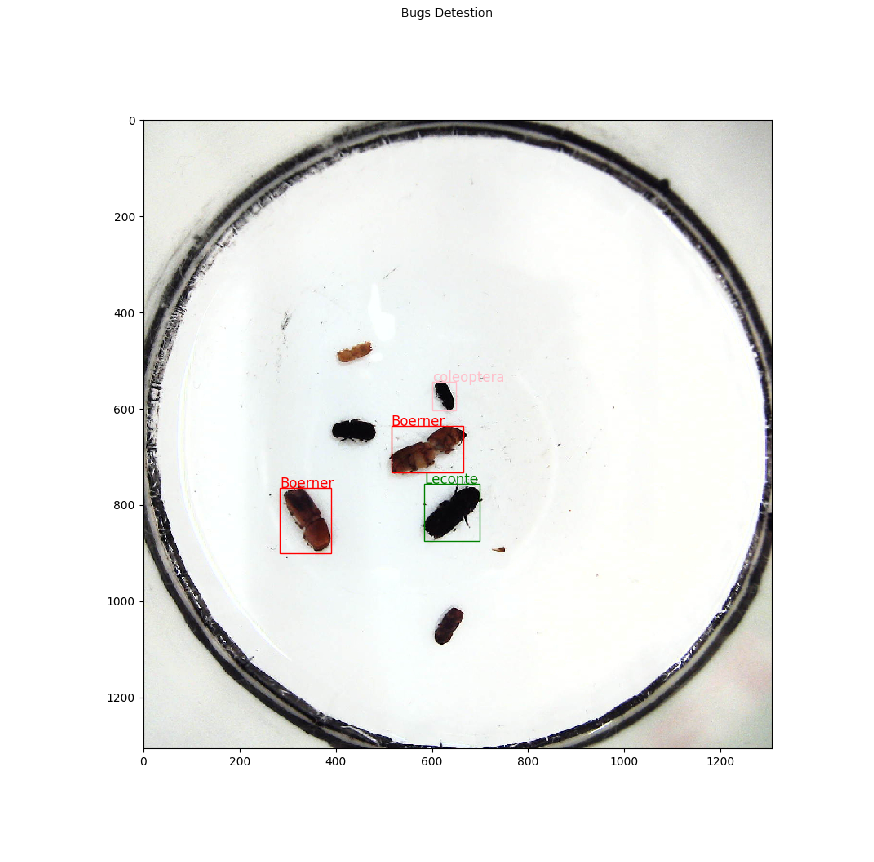

In [ ]:
# 可视化检测结果
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/home/aistudio/work/output_pic.png")

plt.figure("Object Detection", figsize=(15, 15)) # 图像窗口名称
plt.imshow(img)
plt.axis('off') # 关掉坐标轴为 off
plt.title('Bugs Detestion') # 图像题目
plt.show()

# 提升方案

这里给出的是一份基础版本的代码，可以在上面继续改进提升，可以使用的改进方案有：

- 1、使用其它模型如faster rcnn等 （难度系数5）

- 2、使用数据增多，可以对原图进行翻转、裁剪等操作 （难度系数3）

- 3、修改anchor参数的设置，教案中的anchor参数设置直接使用原作者在coco数据集上的设置，针对此模型是否要调整 （难度系数3）

- 4、调整优化器、学习率策略、正则化系数等是否能提升模型精度 （难度系数1）

